# **Data Wrangling**


### Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
filepath = "LaptopPricing-Dataset.csv"
df = pd.read_csv(filepath, header=None)

Verify loading by displaying the dataframe summary using `dataframe.info()`


In [ ]:
print(df.info())

View the first 5 values of the updated dataframe using `dataframe.head()`


In [ ]:
df.head()

Note that we can update the `Screen_Size_cm` column such that all values are rounded to nearest 2 decimal places by using `numpy.round()`


In [ ]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

# Task - 1

### Evaluate the dataset for missing data
Missing data was last converted from '?' to numpy.NaN. Pandas uses NaN and Null values interchangeably. This means, you can just identify the entries having Null values. Write a code that identifies which columns have missing data. 


In [9]:
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")


# Task - 2

### Replace with mean
Missing values in attributes that have continuous data are best replaced using Mean value. We note that values in "Weight_kg" attribute are continuous in nature, and some values are missing. Therefore, write a code to replace the missing values of weight with the average value of the attribute.


In [ ]:

mean_weight=df["Weight_kg"].astype("float").mean(axis=0)
df["Weight_kg"].replace(np.nan,mean_weight,inplace=True)


### Replace with the most frequent value
Missing values in attributes that have categorical data are best replaced using the most frequent value. We note that values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing. Therefore, write a code to replace the missing values of Screen Size with the most frequent value of the attribute.


In [18]:


df["Screen_Size_cm"].mode()
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)

<bound method NDFrame.describe of      Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0             0         Acer         4  IPS Panel    2   1         5   
1             1         Dell         3    Full HD    1   1         3   
2             2         Dell         3    Full HD    1   1         7   
3             3         Dell         4  IPS Panel    2   1         5   
4             4           HP         4    Full HD    2   1         7   
..          ...          ...       ...        ...  ...  ..       ...   
233         233       Lenovo         4  IPS Panel    2   1         7   
234         234      Toshiba         3    Full HD    2   1         5   
235         235       Lenovo         4  IPS Panel    2   1         5   
236         236       Lenovo         3    Full HD    3   1         5   
237         237      Toshiba         3    Full HD    2   1         5   

     Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0            35.560   

# Task - 3

### Fixing the data types
Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.


In [19]:

df["Screen_Size_cm"]=df["Screen_Size_cm"].astype("float")
df["Weight_kg"]=df["Weight_kg"].astype("float")

df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

# Task - 4

### Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

```{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
```


In [26]:

df["Screen_Size_cm"]=df["Screen_Size_cm"]*2.54
df.rename(columns={"Screen_Size_cm":"Screen_Size_inch"},inplace=True)

df["Weight_kg"]=df["Weight_kg"]/2.205
df.rename(columns={"Weight_kg":"Weight_lb"},inplace=True)


Index(['Unnamed: 0', 'Manufacturer', 'Category', 'Screen', 'GPU', 'OS',
       'CPU_core', 'Screen_Size_inch', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_lb', 'Price'],
      dtype='object')

### Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.


In [30]:

df["CPU_frequency"]=df["CPU_frequency"]/df["CPU_frequency"].max(axis=0)

0      0.551724
1      0.689655
2      0.931034
3      0.551724
4      0.620690
         ...   
233    0.896552
234    0.827586
235    0.896552
236    0.862069
237    0.793103
Name: CPU_frequency, Length: 238, dtype: float64
0      0.551724
1      0.689655
2      0.931034
3      0.551724
4      0.620690
         ...   
233    0.896552
234    0.827586
235    0.896552
236    0.862069
237    0.793103
Name: CPU_frequency, Length: 238, dtype: float64


# Task - 5

### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".


In [33]:
# Write your code below and press Shift+Enter to execute
bins=np.linspace(min(df["Price"]),max(df["Price"]),4)
group_names=["Low","Medium","High"]
df["Price_binned"]=pd.cut(df["Price"],bins,labels=group_names,include_lowest=True)
print(df["Price_binned"])

0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
233    Medium
234    Medium
235    Medium
236       Low
237       Low
Name: Price_binned, Length: 238, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


Also, plot the bar graph of these bins.


<BarContainer object of 3 artists>

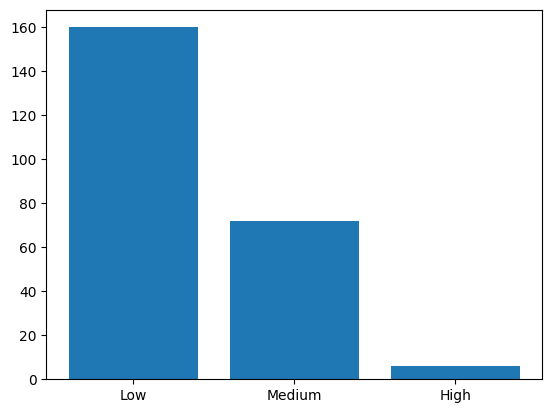

In [41]:

plt.bar(group_names,df["Price_binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Bins")

# Task - 6

### Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.


In [43]:
dummy_variable_1=pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={"IPS Panel":"Screen-IPS_panel","Full HD":"Screen-Full_HD"},inplace=True)
df=pd.concat([df,dummy_variable_1],axis=1)
df.drop("Screen",axis=1,inplace=True)



Print the content of dataframe.head() to verify the changes that were made to the dataset.


In [44]:
print(df.head())

   Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  Screen_Size_inch  \
0           0         Acer         4    2   1         5          90.32240   
1           1         Dell         3    1   1         3         100.64496   
2           2         Dell         3    1   1         7         100.64496   
3           3         Dell         4    2   1         5          85.80628   
4           4           HP         4    2   1         7         100.64496   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_lb  Price Price_binned  \
0       0.551724       8             256   0.725624    978          Low   
1       0.689655       4             256   0.997732    634          Low   
2       0.931034       8             256   0.997732    946          Low   
3       0.551724       8             128   0.553288   1244          Low   
4       0.620690       8             256   0.866213    837          Low   

   Screen-Full_HD  Screen-IPS_panel  
0           False              True  
1         